# Distributions
A collection of commonly used distributions and their properties.

## Discrete Distributions <a name="discrete-distributions"></a>
Discrete distributions describe the likelihood of outcomes for discrete random variables, which can only take on a finite or countably infinite number of distinct values.

### Bernoulli Distribution <a name="bernoulli-distribution"></a>
Example: Coin toss, heads (success) or tails (failure).

Binary, boolean output: 1 (success) with probability p, or 0 (failure) with probability q=1-p.
* Mean: $p$
* Variance: $pq$

Successes: 6957, Failures: 3043


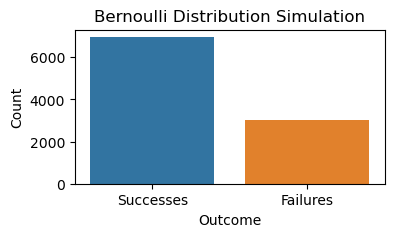

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

num_simulations = 10000

p = 0.7 # probability of getting a "success"
simulations = np.random.binomial(n=1, p=p, size=num_simulations)
successes = np.count_nonzero(simulations == 1)
failures = np.count_nonzero(simulations == 0)
print(f'Successes: {successes}, Failures: {failures}')

plt.figure(figsize=(4, 2))
sns.barplot(x=['Successes', 'Failures'], y=[successes, failures], palette=['#1f77b4', '#ff7f0e'])
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.title('Bernoulli Distribution Simulation')
plt.show()

### Binomial Distribution <a name="binomial-distribution"></a>
Number of successful Bernoulli trials in a sequence.

Example: Calculating the probability of getting a specific number of heads in a fixed number of coin tosses.

[Online Calculator](https://homepage.divms.uiowa.edu/~mbognar/applets/bin.html)

Parameters:
  * n: # of successes in a sequence of independent experiments, each asking a yes–no question
  * x: # of times for a specific outcome within n trials
  * p: probability of success or failure 
  * q: probability of failure (1-p)
  
Properties:
* Formula: ${n \choose x} p^x q^{n-x}$
* Mean: $np$
* Variance: $npq$

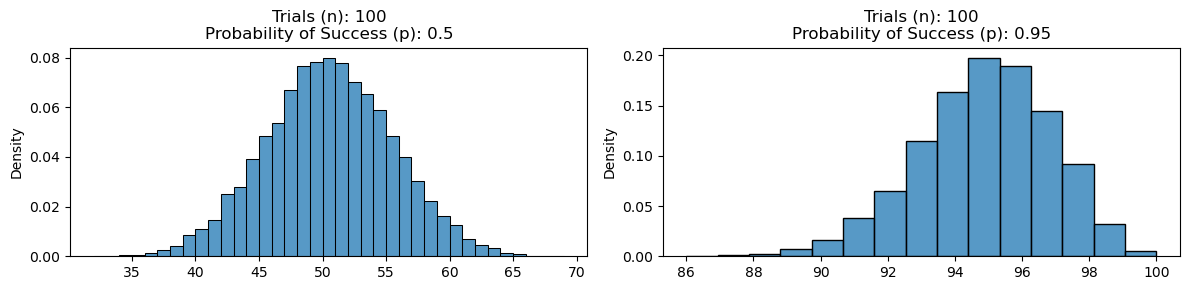

In [2]:
fig, axs = plt.subplots(1, 2, figsize=(12, 3))

n = 100 # number of trials
p = 0.5 # probability of getting a "success" (heads)
simulations = np.random.binomial(n=n, p=p, size=num_simulations)
plot_settings = {'bins': len(np.unique(simulations)), 'color': '#1f77b4', 'stat': 'density'}
sns.histplot(simulations, ax=axs[0], **plot_settings)
axs[0].set_title(f'Trials (n): {n}\nProbability of Success (p): {p}')

n = 100 # number of trials
p = 0.95 # probability of getting a "success" (heads)
simulations = np.random.binomial(n=n, p=p, size=num_simulations)
plot_settings = {'bins': len(np.unique(simulations)), 'color': '#1f77b4', 'stat': 'density'}
sns.histplot(simulations, ax=axs[1], **plot_settings)
axs[1].set_title(f'Trials (n): {n}\nProbability of Success (p): {p}')
plt.tight_layout()
plt.show()

### Geometric Distribution <a name="geometric-distribution"></a>
Number of Bernoulli trials until success.

Example: Finding the probability that a customer will have to call a certain number of times before their issue is resolved.

Properties:
* Mean: $ \frac{1}{p} $
* Variance: $\frac{q}{p^2} $

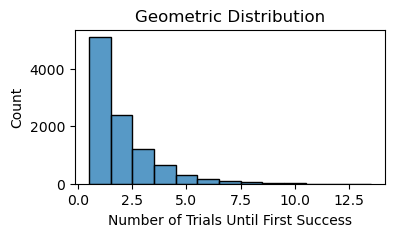

In [3]:
p = 0.5 # probability of getting a "success" (heads)
simulations = np.random.geometric(p=p, size=num_simulations)

plt.figure(figsize=(4, 2))
sns.histplot(simulations, color='#1f77b4', discrete=True)
plt.xlabel('Number of Trials Until First Success')
plt.ylabel('Count')
plt.title('Geometric Distribution')
plt.show()

### Negative Binomial Distribution <a name="negative-binomial-distribution"></a>
Modeling the number of failed attempts before achieving a specified number of successes in a process.

Example: Determining the number of days until a certain number of people have been infected in a disease outbreak.

FFFSSFS = NegBin(3,p)=7 

$ f(y) = \binom{k + r - 1}{k} q^{y - r} p^r $, where $y = r, r + 1, \ldots$
Properties:
* Mean: $ \frac{r}{p} $
* Variance: $ \frac{qr}{p^2} $

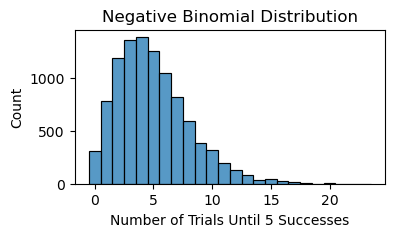

In [4]:
r = 5 # number of successes
p = 0.5 # probability of getting a "success" (heads)
simulations = np.random.negative_binomial(n=r, p=p, size=num_simulations)

plt.figure(figsize=(4, 2))
sns.histplot(simulations, color='#1f77b4', discrete=True)
plt.xlabel('Number of Trials Until {} Successes'.format(r))
plt.ylabel('Count')
plt.title('Negative Binomial Distribution')
plt.show()

### Poisson Distribution <a name="poisson-distribution"></a>
Example: Estimating the number of incoming calls to a call center in a fixed time period.

$ f(x) = \frac{\lambda^x e^{-\lambda}}{x!} $

$ F(x) = e^{-\lambda} \sum_{i=0}^{x} \frac{\lambda^i}{i!} $

Properties:
* Mean: $ \lambda $
* Variance: $ \lambda $

Eg. Pois(12), What is the prob of exactly 8?
   (use pmf) 128*e-12/8! =6.55%

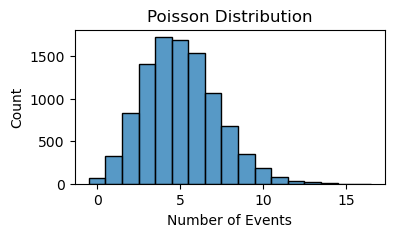

In [5]:
lam = 5 # lambda - average rate of success (events per interval)
simulations = np.random.poisson(lam=lam, size=num_simulations)

plt.figure(figsize=(4, 2))
sns.histplot(simulations, color='#1f77b4', discrete=True)
plt.xlabel('Number of Events')
plt.ylabel('Count')
plt.title('Poisson Distribution')
plt.show()

## Continuous Distributions <a name="continuous-distributions"></a>

### Normal Distribution <a name="normal-distribution"></a>
Example: Modeling the distribution of scores on standardized tests such as the SAT.

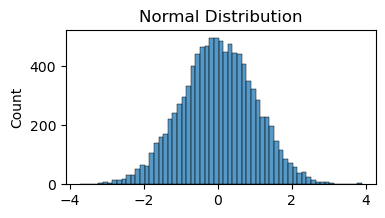

In [6]:
mu = 0 # mean
sigma = 1 # standard deviation
simulations = np.random.normal(loc=mu, scale=sigma, size=num_simulations)

plt.figure(figsize=(4, 2))
sns.histplot(simulations, color='#1f77b4')
plt.ylabel('Count')
plt.title('Normal Distribution')
plt.show()

### Log-Normal Distribution <a name="lognormal-distribution"></a> 
The Log-Normal distribution effectively models data that grows exponentially or has multiplicative rather than additive effects. If a random variable $X$ is log-normally distributed, then $Y = ln(X)$ has a normal distribution.

Example: Average call time at a call center.

Fun fact: You can get a log-normal distribution by exponentiating the normal distribution.

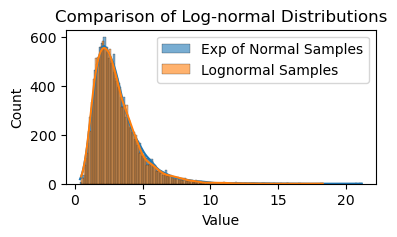

In [7]:
mu = 1
sigma = 0.5
normal_samples = np.random.normal(loc=mu, scale=sigma, size=num_simulations)
log_normal_samples_direct = np.random.lognormal(mean=mu, sigma=sigma, size=num_simulations)

plt.figure(figsize=(4, 2))
sns.histplot(np.exp(normal_samples), color='#1f77b4', kde=True, label='Exp of Normal Samples', alpha=0.6)
sns.histplot(log_normal_samples_direct, color='#ff7f0e', kde=True, label='Lognormal Samples', alpha=0.6)
plt.xlabel('Value')
plt.ylabel('Count')
plt.title('Comparison of Log-normal Distributions')
plt.legend()
plt.show()


### Chi-squared distribution <a name="Chi-squared-distribution"></a>

Used primarily in hypothesis testing, and to a lesser extent for confidence intervals for population variance when the underlying distribution is normal. Not as often applied in the direct modeling of natural phenomena.

**Goodness of Fit Test**: Checking how well observed data fit a theoretical distribution.

**Independence Test**: Testing for independence between two categorical variables in a contingency table.

$ \chi^2 = \sum_{i=1}^{k} Z_i^2 $

Where $ Z_1^2, ..., Z_k^2 $ are standard normal random variables and $k$ is "degrees of freedom"

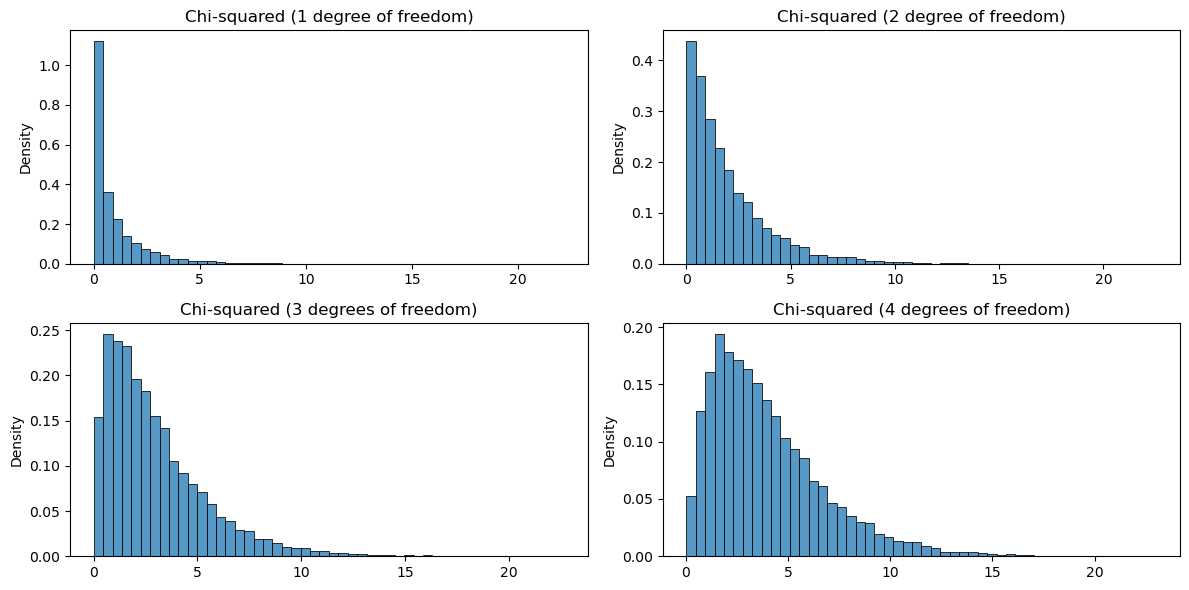

In [8]:
rng = np.random.default_rng()
Z_1 = rng.standard_normal(num_simulations)**2
Z_2 = rng.standard_normal(num_simulations)**2
Z_3 = rng.standard_normal(num_simulations)**2
Z_4 = rng.standard_normal(num_simulations)**2

plot_settings = {'bins': 50, 'color': '#1f77b4', 'stat': 'density'}
fig, axs = plt.subplots(2, 2, figsize=(12, 6))
sns.histplot(Z_1, ax=axs[0, 0], **plot_settings)
axs[0, 0].set_title('Chi-squared (1 degree of freedom)')

sns.histplot(Z_1 + Z_2, ax=axs[0, 1], **plot_settings)
axs[0, 1].set_title('Chi-squared (2 degree of freedom)')

sns.histplot(Z_1 + Z_2 + Z_3, ax=axs[1, 0], **plot_settings)
axs[1, 0].set_title('Chi-squared (3 degrees of freedom)')

sns.histplot(Z_1 + Z_2 + Z_3 + Z_4, ax=axs[1, 1], **plot_settings)
axs[1, 1].set_title('Chi-squared (4 degrees of freedom)')

plt.tight_layout()
plt.show()

### Uniform Distribution <a name="uniform-distribution"></a>
Example: Rolling a dice.

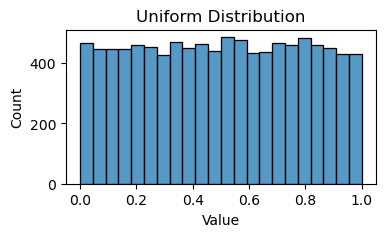

In [9]:
low = 0 # lower boundary of the output interval
high = 1 # upper boundary of the output interval
simulations = np.random.uniform(low=low, high=high, size=num_simulations)

plt.figure(figsize=(4, 2))
sns.histplot(simulations, color='#1f77b4')
plt.xlabel('Value')
plt.ylabel('Count')
plt.title('Uniform Distribution')
plt.show()

### Exponential Distribution <a name="exponential-distribution"></a>
Modeling the time between events in a Poisson process, such as the time between arrivals of customers at a bank.

Example: Estimating the time until failure for electronic components that have a constant failure rate over time.

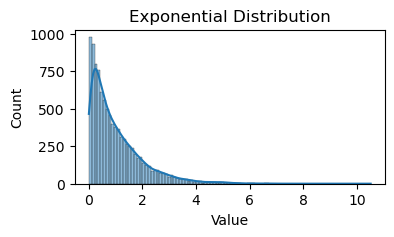

In [10]:
scale = 1 # scale parameter (1 / lambda)
simulations = np.random.exponential(scale=scale, size=num_simulations)

plt.figure(figsize=(4, 2))
sns.histplot(simulations, color='#1f77b4', kde=True)
plt.xlabel('Value')
plt.ylabel('Count')
plt.title('Exponential Distribution')
plt.show()

### Mixture Distribution <a name="mixture-distribution"></a>

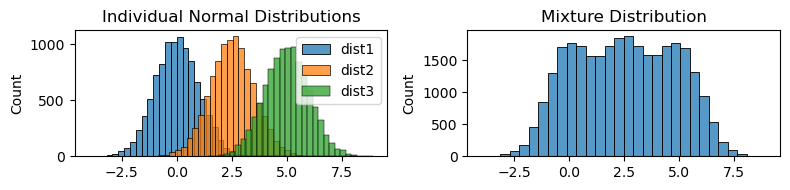

In [11]:
dist1 = np.random.normal(loc=0, scale=1, size=num_simulations)
dist2 = np.random.normal(loc=2.5, scale=1, size=num_simulations)
dist3 = np.random.normal(loc=5, scale=1, size=num_simulations)

fig, axs = plt.subplots(1, 2, figsize=(8, 2))
sns.histplot(dist1, color='#1f77b4', kde=False, ax=axs[0], label='dist1', bins=30)
sns.histplot(dist2, color='#ff7f0e', kde=False, ax=axs[0], label='dist2', bins=30)
sns.histplot(dist3, color='#2ca02c', kde=False, ax=axs[0], label='dist3', bins=30)
axs[0].set_ylabel('Count')
axs[0].set_title('Individual Normal Distributions')
axs[0].legend()

sns.histplot(np.hstack([dist1, dist2, dist3]), color='#1f77b4', kde=False, ax=axs[1], bins=30)
axs[1].set_ylabel('Count')
axs[1].set_title('Mixture Distribution')

plt.tight_layout()
plt.show()

### Beta Distribution <a name="beta-distribution"></a>
Example adapted from [John Cook's "A Bayesian view of Amazon Resellers"](https://www.johndcook.com/blog/2011/09/27/bayesian-amazon/). 

We want to choose the best seller given the following ratings:
- 100% positive out of 10 reviews
- 98% positive out of 100 reviews
- 97% positive out of 1000 reviews

To find the posterior estimate, we add 1 positive and 1 negative review to each. 

Beta(11, 1) -> Mean: 0.917, Variance: 0.006, Skewness: -1.553, Kurtosis: 2.977
Beta(99, 3) -> Mean: 0.971, Variance: 0.000, Skewness: -1.087, Kurtosis: 1.699
Beta(971, 31) -> Mean: 0.969, Variance: 0.000, Skewness: -0.342, Kurtosis: 0.169


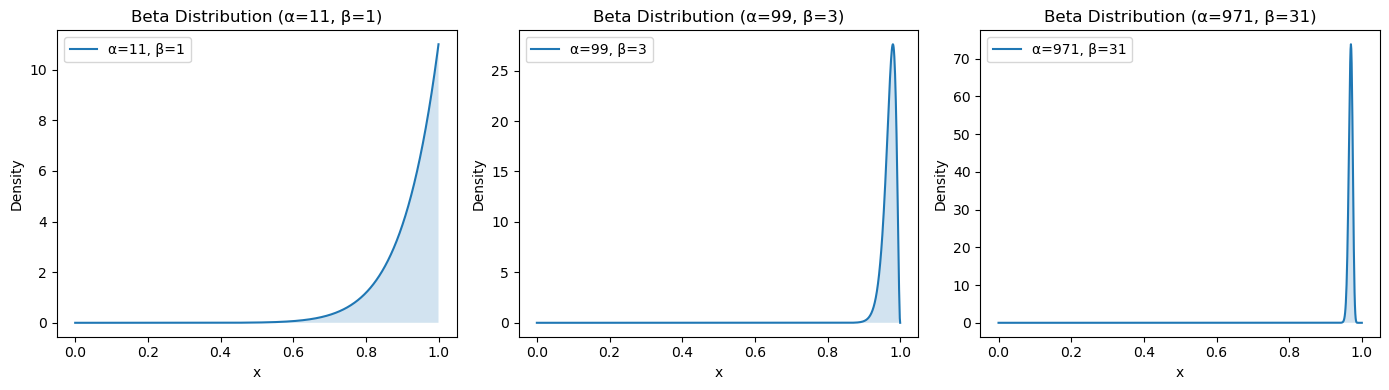

In [12]:
# Three beta distributions
params = [
    (10, 0), 
    (98, 2), 
    (970, 30)
]
params = [(p[0]+1, p[1]+1) for p in params] # Add 1 every value
x = np.linspace(0, 1, 1000)

fig, axs = plt.subplots(1, 3, figsize=(14, 4))
for i, (a, b) in enumerate(params):
    mean, var, skew, kurt = stats.beta.stats(a, b, moments='mvsk')
    print(f"Beta({a}, {b}) -> Mean: {mean:.03f}, Variance: {var:.03f}, Skewness: {skew:.03f}, Kurtosis: {kurt:.03f}")
    
    y = stats.beta.pdf(x, a, b)
    axs[i].plot(x, y, label=f'α={a}, β={b}')
    axs[i].fill_between(x, y, alpha=0.2)
    axs[i].set_title(f'Beta Distribution (α={a}, β={b})')
    axs[i].set_xlabel('x')
    axs[i].set_ylabel('Density')
    axs[i].legend()

plt.tight_layout()
plt.show()

The probability $P(X > Y)$ for $X \sim \text{Beta}(\alpha_1, \beta_1)$ and $Y \sim \text{Beta}(\alpha_2, \beta_2)$ is found with:

$ P(X > Y) = \int_0^1 \text{BetaCDF}(y; \alpha_1, \beta_1) \cdot \text{BetaPDF}(y; \alpha_2, \beta_2) \, dy $

In [13]:
from scipy.integrate import quad

alpha1, beta1 = 99, 3
alpha2, beta2 = 971, 31

def integrand(y):
    return stats.beta.cdf(y, alpha1, beta1) * stats.beta.pdf(y, alpha2, beta2)

result, _ = quad(integrand, 0, 1) # Compute the integral
print(f"The probability that a sample from Beta({alpha1}, {beta1}) is greater than a sample from Beta({alpha2}, {beta2}) is {result:.3f}")

The probability that a sample from Beta(99, 3) is greater than a sample from Beta(971, 31) is 0.403


In [14]:
# Or we can estimate the probability with random variables
size = 100000
b1 = stats.beta.rvs(alpha1, beta1, size=size)
b2 = stats.beta.rvs(alpha2, beta2, size=size)
result = len(b1[b1<b2]) / size
print(f"The probability that a sample from Beta({alpha1}, {beta1}) is greater than a sample from Beta({alpha2}, {beta2}) is {result:.3f}")

The probability that a sample from Beta(99, 3) is greater than a sample from Beta(971, 31) is 0.402


## Statistical Tests for Determining Distribution <a name="test-distributions"></a>
### Quantile-Quantile Plots (QQ plots) <a name="qq-plot"></a>
[StatQuest - Quantile-Quantile Plots (QQ plots), Clearly Explained!!!](https://www.youtube.com/watch?v=okjYjClSjOg)

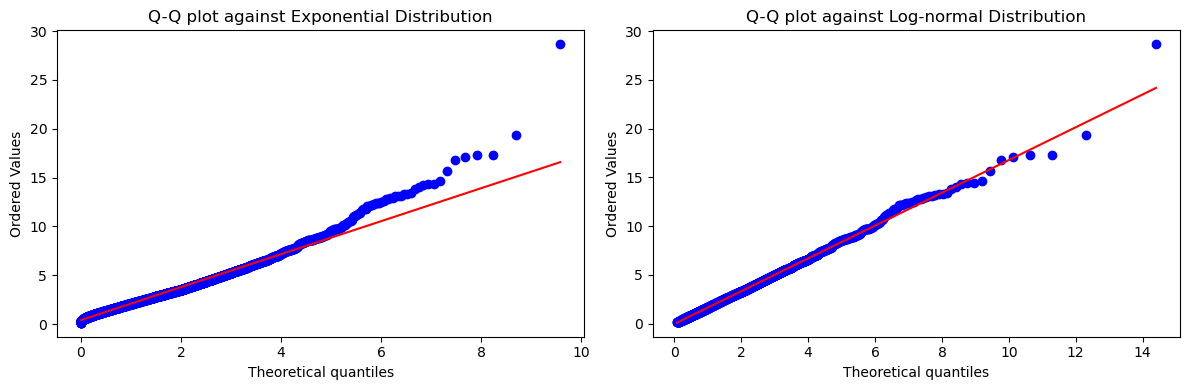

In [15]:
data = np.random.lognormal(mean=0.5, sigma=0.7, size=num_simulations)

plt.figure(figsize=(12, 4))

# Exponential Q-Q plot
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st plot
stats.probplot(data, dist=stats.expon, plot=plt)
plt.title('Q-Q plot against Exponential Distribution')

# Log-normal Q-Q plot
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd plot
stats.probplot(data, dist=stats.lognorm(s=0.7), plot=plt)
plt.title('Q-Q plot against Log-normal Distribution')

plt.tight_layout() 
plt.show()